In [1]:
pip install -q snscrape transformers matplotlib wordcloud seaborn scikit-plot contractions nltk regex tweetnlp

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import tweepy
import warnings
import snscrape.modules.twitter as sntwitter
import requests
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tweetnlp

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import contractions
import re
import time
from joblib import Parallel, delayed
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

C:\Users\temit\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\temit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\temit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
TExtract = pd.read_csv('TwitterExtract.csv',encoding= 'MacRoman')

In [4]:
TExtract.head()

,Datetime,Text,Username,Retweet,Views,Search Criteria,"Positive (P), Negative(N), Both(B), Neutral(U)"
0,10/02/2023,Say What You Want But This Harry Potter Is The...,NaN,1,967,Harry Potter,P
1,01/02/2023,Where?S The Edd Bank Of America BeyoncÈ Presale?,AmyScarlata,1,212,Bank Of America,P
2,26/01/2023,@Besoccerfr Pep Guardiola And Pulisitch,Khaled_Dz_2006,0,19,Pep Guardiola,P
3,10/02/2023,@Bluedinifree @Marshablackburn He Was Getting ...,JamesAR1116,0,17,Netflix,U
4,10/02/2023,@Wizard_Coder @Bearbulltraders I Trade Perpetu...,RecoveryTraders,0,37,Ftx,U


In [5]:
TExtract.rename(columns={"Positive (P), Negative(N), Both(B), Neutral(U)": "Sentiment"}, inplace=True)

sentiment_mapping = {'P': 'positive', 'N': 'negative', 'U': 'neutral', 'B': 'both'} # Define a mapping of old values to new values
TExtract['Sentiment'] = TExtract['Sentiment'].replace(sentiment_mapping)

In [6]:
valid_sentiments = ['positive', 'negative', 'neutral'] # Define a list of valid sentiments
TExtract = TExtract[TExtract['Sentiment'].isin(valid_sentiments)]

In [7]:
TExtract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27279 entries, 0 to 29998
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Datetime         27279 non-null  object
 1   Text             27279 non-null  object
 2   Username         24536 non-null  object
 3   Retweet          27279 non-null  int64 
 4   Views            27279 non-null  int64 
 5   Search Criteria  27279 non-null  object
 6   Sentiment        27279 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [8]:
print ('============================================')
print ("Search Criteria breakdown")
print ('============================================')
TExtract['Search Criteria'].value_counts().head(20)

Search Criteria breakdown


Harry Potter    745
Adele           708
Netflix         697
Lebron James    690
Amouranth       670
Liz Truss       655
Primark         646
Coca-cola       622
Amazon          612
Andrew Tate     603
Wayfair         594
Walmart         582
Chelsea         575
Iphone          567
Tesco           563
Arsenal         560
Paypal          559
Chris Brown     539
Burna Boy       535
Asda            522
Name: Search Criteria, dtype: int64

In [9]:
TExtract['TextClean'] = TExtract['Text']

In [92]:
Filteredtweets = TExtract[TExtract['Search Criteria'] == 'Iphone'].copy()

In [93]:
Filteredtweets.reset_index(inplace=True)

In [94]:
Filteredtweets.head()

,index,Datetime,Text,Username,Retweet,Views,Search Criteria,Sentiment,TextClean
0,5,07/02/2023,"? Tagged #Hashtag,#Ciberamenazas,#Ciberconsejos,#Ciberestafa,#Ciberseguridad,,#Cordoba, #Coronelrafemi,#Datos,#Delitostelematicos,,#Hackers,#Iphone,#Malware,#Marketing,#Movil,,#Password,#Phishing,#Rafaelfernandezmiquel,#Rafemi,#Rrss,#Troyano,#Viru,#Vishing,#Web,#Google",rafemi,0,27,Iphone,neutral,"? Tagged #Hashtag,#Ciberamenazas,#Ciberconsejos,#Ciberestafa,#Ciberseguridad,,#Cordoba, #Coronelrafemi,#Datos,#Delitostelematicos,,#Hackers,#Iphone,#Malware,#Marketing,#Movil,,#Password,#Phishing,#Rafaelfernandezmiquel,#Rafemi,#Rrss,#Troyano,#Viru,#Vishing,#Web,#Google"
1,19,28/12/2022,"Hey @Apple , With All Of These System Updates, I Need You All To Figure Out A Way For Us To Remove Ourself From Group Texts, That Are Dominated By Android Users. Thanks. ?? #Iphone #Customecare",MrAveryBrown,0,77,Iphone,positive,"Hey @Apple , With All Of These System Updates, I Need You All To Figure Out A Way For Us To Remove Ourself From Group Texts, That Are Dominated By Android Users. Thanks. ?? #Iphone #Customecare"
2,65,26/01/2023,"Can I Ask All You Apple Product Users: Why Would U Buy Airpods If You Are Just Going To Buy The Wire To Attach To Them. Just Buy Regular Headphones, And Save Yourself Some Money. Stop Trying To Fit In. #Apple #Airpodsmax #Iphone14 #Applemusic #Airpods #Iphone #Android18",cunderw12,0,147,Iphone,positive,"Can I Ask All You Apple Product Users: Why Would U Buy Airpods If You Are Just Going To Buy The Wire To Attach To Them. Just Buy Regular Headphones, And Save Yourself Some Money. Stop Trying To Fit In. #Apple #Airpodsmax #Iphone14 #Applemusic #Airpods #Iphone #Android18"
3,237,31/01/2023,"@Apple Please Fix The Voice Notes Not Being Able To Play In The Background And Not Being Able To Easily Fast Forward, Change The Speed Etc. #Apple #Iphone",NandyVersatil,0,30,Iphone,positive,"@Apple Please Fix The Voice Notes Not Being Able To Play In The Background And Not Being Able To Easily Fast Forward, Change The Speed Etc. #Apple #Iphone"
4,248,24/12/2022,Rip #Twitterforiphone And #Twitterforandroid #Twitter #Iphone #Android @Twitter,ninaadsadaphal,0,18,Iphone,positive,Rip #Twitterforiphone And #Twitterforandroid #Twitter #Iphone #Android @Twitter


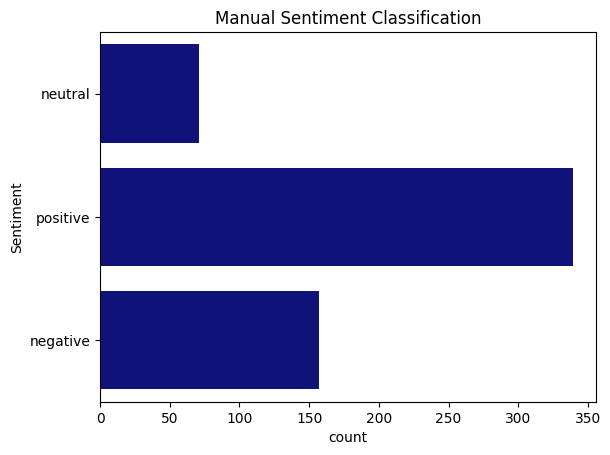

In [95]:
sns.countplot(y='Sentiment', data=Filteredtweets, color = 'darkblue')
plt.title('Manual Sentiment Classification')
plt.show()

In [96]:
# remove '\n', lowercase all letters
Filteredtweets['TextClean'] = Filteredtweets['TextClean'].apply(lambda x: x.replace('\n',' ').lower())

# expand contractions
Filteredtweets['TextClean'] = Filteredtweets['TextClean'].apply(lambda x: contractions.fix(x))

# remove punctuations
Filteredtweets['TextClean'] = Filteredtweets['TextClean'].apply(lambda x: re.sub(r'[^\w\s]','',x))

#remove HTML tags
Filteredtweets['TextClean'] = Filteredtweets['TextClean'].apply(lambda x: re.sub(re.compile('<.*?>'), '', x))

#remove consecutive characters that occur three or more times in a row, and replace them with just two occurrences of that character.
Filteredtweets['TextClean'] = Filteredtweets['TextClean'].apply(lambda x: re.compile(r"(.)\1{2,}").sub(r"\1\1", x))

# Removing extra spaces
Filteredtweets['TextClean'] = Filteredtweets['TextClean'].apply(lambda x: re.sub(' +',' ',x))

# Removing stop words
stop_words = set(stopwords.words('english'))
Filteredtweets['TextClean'] = Filteredtweets['TextClean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Tokenize the text data using NLTK
# Filteredtweets['TextClean'] = Filteredtweets['TextClean'].apply(lambda x: word_tokenize(x))

In [97]:
Filteredtweets[['Text', 'TextClean']]

,Text,TextClean
0,"? Tagged #Hashtag,#Ciberamenazas,#Ciberconsejos,#Ciberestafa,#Ciberseguridad,,#Cordoba, #Coronelrafemi,#Datos,#Delitostelematicos,,#Hackers,#Iphone,#Malware,#Marketing,#Movil,,#Password,#Phishing,#Rafaelfernandezmiquel,#Rafemi,#Rrss,#Troyano,#Viru,#Vishing,#Web,#Google",tagged hashtagciberamenazasciberconsejosciberestafaciberseguridadcordoba coronelrafemidatosdelitostelematicoshackersiphonemalwaremarketingmovilpasswordphishingrafaelfernandezmiquelrafemirrsstroyanoviruvishingwebgoogle
1,"Hey @Apple , With All Of These System Updates, I Need You All To Figure Out A Way For Us To Remove Ourself From Group Texts, That Are Dominated By Android Users. Thanks. ?? #Iphone #Customecare",hey apple system updates need figure way us remove ourself group texts dominated android users thanks iphone customecare
2,"Can I Ask All You Apple Product Users: Why Would U Buy Airpods If You Are Just Going To Buy The Wire To Attach To Them. Just Buy Regular Headphones, And Save Yourself Some Money. Stop Trying To Fit In. #Apple #Airpodsmax #Iphone14 #Applemusic #Airpods #Iphone #Android18",ask apple product users would buy airpods going buy wire attach buy regular headphones save money stop trying fit apple airpodsmax iphone14 applemusic airpods iphone android18
3,"@Apple Please Fix The Voice Notes Not Being Able To Play In The Background And Not Being Able To Easily Fast Forward, Change The Speed Etc. #Apple #Iphone",apple please fix voice notes able play background able easily fast forward change speed etc apple iphone
4,Rip #Twitterforiphone And #Twitterforandroid #Twitter #Iphone #Android @Twitter,rip twitterforiphone twitterforandroid twitter iphone android twitter
...,...,...
562,@Velcocinemas Last Time License This Time #Iphone ? Huge Respect ?,velcocinemas last time license time iphone huge respect
563,1/ It's So Unfortunate That Ftx One Of The World Largest Cryptocurrency Exchange Is Now A Bankrupt Company. The Investments Of Customers Just Went Down The Drain Like That. The Former Ceo Of Ftx Sam Bankman-fried Denied That The Money Wasn't Siphoned. #Freckvcs #Iamsocialminer,1 unfortunate ftx one world largest cryptocurrency exchange bankrupt company investments customers went drain like former ceo ftx sam bankmanfried denied money siphoned freckvcs iamsocialminer
564,"Today, I Changed My #Iphone Apps Settings. 1. Apple Mail 2. Display Settings. 3. Maps. 4. Notes. 5. Safari. 6. Wallpapers. Some New Features To Unlocked And Some Features To Switch Off. || #Apple | #Iphone6 | #Iphonewallpaper | #Iphonewallpapers | #Safari | #Applemail ||",today changed iphone apps settings 1 apple mail 2 display settings 3 maps 4 notes 5 safari 6 wallpapers new features unlocked features switch apple iphone6 iphonewallpaper iphonewallpapers safari applemail
565,#Iphone Chargers Should Be Called Apple Juice,iphone chargers called apple juice


In [98]:
Filteredtweets['TextClean']

0      tagged hashtagciberamenazasciberconsejosciberestafaciberseguridadcordoba coronelrafemidatosdelitostelematicoshackersiphonemalwaremarketingmovilpasswordphishingrafaelfernandezmiquelrafemirrsstroyanoviruvishingwebgoogle
1                                                                                                       hey apple system updates need figure way us remove ourself group texts dominated android users thanks iphone customecare
2                                                ask apple product users would buy airpods going buy wire attach buy regular headphones save money stop trying fit apple airpodsmax iphone14 applemusic airpods iphone android18
3                                                                                                                       apple please fix voice notes able play background able easily fast forward change speed etc apple iphone
4                                                                                                   

In [99]:
# Load the model
model = tweetnlp.load_model('sentiment')

# Define the sentiment analysis function
def get_sentiment(text):
    return model.sentiment(text)['label']

# Apply the function to each row of the 'filtertweet[textclean]' column and store the result in a new column called 'sentiment'
Filteredtweets['Tweetsentiment'] = Filteredtweets['TextClean'].apply(get_sentiment)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [100]:
# Load the model
model = tweetnlp.load_model('sentiment')

# Define the sentiment analysis function
def get_sentiment(text):
    return model.sentiment(text)['label']

# Apply the function to each row of the 'filtertweet[textclean]' column and store the result in a new column called 'sentiment'
Filteredtweets['TweetsentimentNoCleaning'] = Filteredtweets['Text'].apply(get_sentiment)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [102]:
Filteredtweets['Tweetsentiment'].value_counts()

neutral     267
negative    150
positive    150
Name: Tweetsentiment, dtype: int64

In [103]:
Filteredtweets['TweetsentimentNoCleaning'].value_counts()

neutral     262
negative    176
positive    129
Name: TweetsentimentNoCleaning, dtype: int64

In [104]:
Filteredtweets['Sentiment'].value_counts()

positive    339
negative    157
neutral      71
Name: Sentiment, dtype: int64

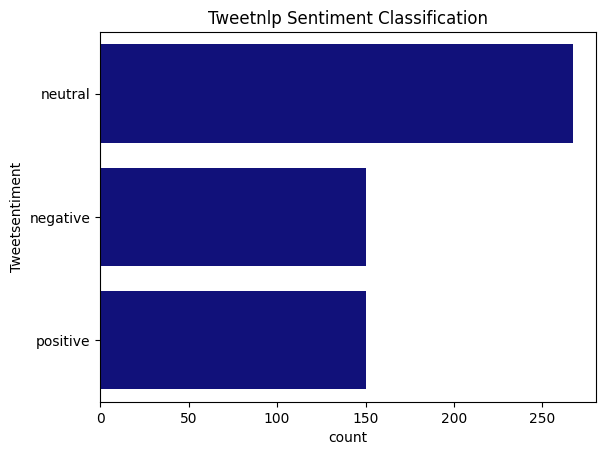

In [105]:
sns.countplot(y='Tweetsentiment', data=Filteredtweets, color = 'darkblue')
plt.title('Tweetnlp Sentiment Classification')
plt.show()

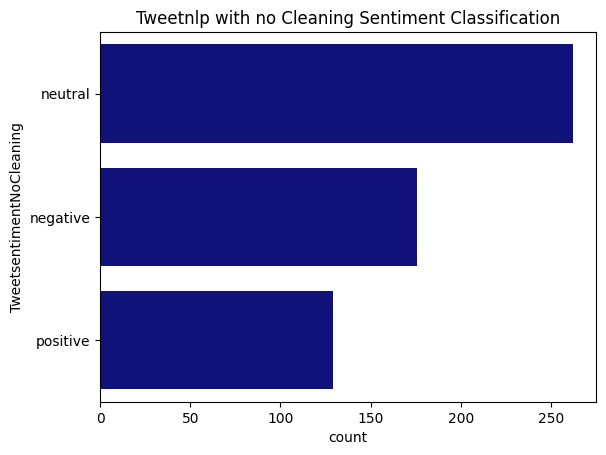

In [106]:
sns.countplot(y='TweetsentimentNoCleaning', data=Filteredtweets, color = 'darkblue')
plt.title('Tweetnlp with no Cleaning Sentiment Classification')
plt.show()

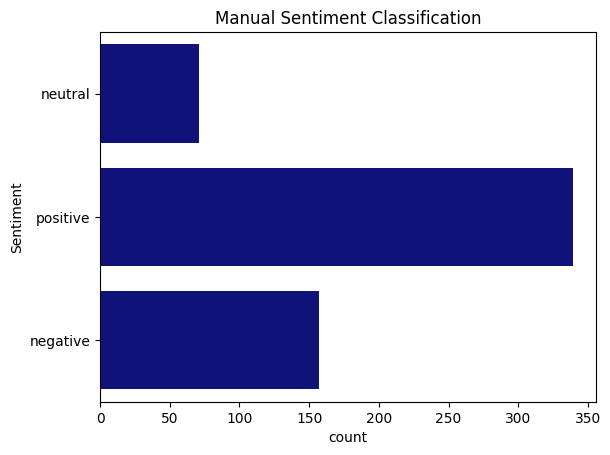

In [107]:
sns.countplot(y='Sentiment', data=Filteredtweets, color = 'darkblue')
plt.title('Manual Sentiment Classification')
plt.show()

In [108]:
Filteredtweets['CompareCnU'] = Filteredtweets['TweetsentimentNoCleaning'] == Filteredtweets['Tweetsentiment']

In [109]:
Filteredtweets['CompareCnU'].value_counts()

True     413
False    154
Name: CompareCnU, dtype: int64

In [110]:
# Filter rows where Compare is False
false_compare = Filteredtweets.loc[Filteredtweets['CompareCnU'] == False, ['Text', 'TweetsentimentNoCleaning', 'Tweetsentiment', 'CompareCnU']]

# Print the resulting dataframe
pd.set_option('display.max_colwidth', None)
false_compare.head(20)

,Text,TweetsentimentNoCleaning,Tweetsentiment,CompareCnU
3,"@Apple Please Fix The Voice Notes Not Being Able To Play In The Background And Not Being Able To Easily Fast Forward, Change The Speed Etc. #Apple #Iphone",negative,neutral,False
4,Rip #Twitterforiphone And #Twitterforandroid #Twitter #Iphone #Android @Twitter,neutral,negative,False
5,Google Lens Is The Only Thing That Could Convert Iphone Users To Androids,positive,neutral,False
11,"My #Iphone Just Reset Everyone's Birthday In My Calendar To January 1, 1601? ??? @Applesupport - Any Suggestions?",negative,neutral,False
14,Craving For An Iphone ? Visit Iphone Phobia For Cheap Apple Products And Its Original Discounts Are Also Available #Apple #Iphone Check Out There Instagram For More Updates.,positive,neutral,False
16,The Phone Is Getting Smarter. Why Aren't We? #Saturdaythoughts #Iphone,neutral,positive,False
17,I Never Had Such Dumb Billing Problems On My #Android Phone As I Am Having On My #Iphone,negative,neutral,False
25,@Millimiano When Did I Agree With You That Iphone Is Better Than Samsung?,neutral,positive,False
35,@Gate_Io I Want #Iphone Because I'm In Need Of A Phone.,positive,neutral,False
36,Come On #Teampixel! Don't Make Me Migrate To #Iphone.,negative,neutral,False


In [111]:
# Print the resulting dataframe
pd.set_option('display.max_colwidth', None)
false_compare.tail(20)

,Text,TweetsentimentNoCleaning,Tweetsentiment,CompareCnU
492,Dear @Apple ?.. #Applepencil For #Iphone. That Is All. #Applepencil4iphone,positive,neutral,False
495,Was Today Years Old When I Found Out How Airdrop Works. ? #Iphone #Today,neutral,positive,False
500,Just Installed The Newest #Twitter App Update For #Iphone,positive,neutral,False
505,The More Apple Complicates Their Iphone? I?M Thinking Iphone4 Was Better #View #Iphone #Softwaredeveloper #Software #Realissue,negative,neutral,False
506,@Aarkibolbobolo Samsung Ar On Iphone Is Cheating.,negative,neutral,False
507,#Apple Has Quietly Introduced A Setting That Lets The Company Decide When It?S Best To Charge Your #Iphone. Just Because It Is Plugged In Does Not Mean It Is Charging. This Is An Issue For The @Ftc,negative,neutral,False
520,Why #Fursat - A Film Completely Shot Using #Iphone Is Of Only 30 Minutes Duration? Space Full Hoo Gya Hoga Gaizz ?,negative,neutral,False
522,My #Iphone Just Went Into #Dark Mode But It?S Daylight ???,negative,neutral,False
524,"Fomo A Lot Of Folks Suffer From This. I Do Too. We Look For The Newest Shiny Thing. The Next Iphone, The Next Samsung, The Next Car, Console, Etc. We Want To Be Part Of The Cool Crowd. That Desire Fuels A Lot Of Our Impulse Buying.",negative,neutral,False
525,Why Iphone 12 Is Lighter I Feel Like I Am Using Andorid Lol #Iphone,neutral,positive,False


In [112]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
 

 

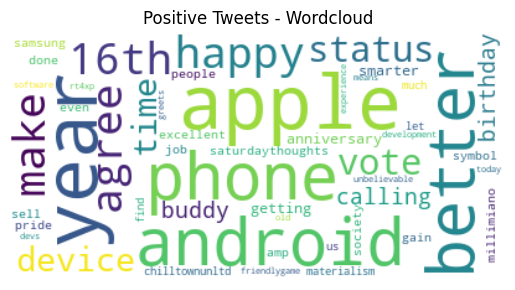

In [120]:
# Wordcloud with positive tweets
positive_tweets = Filteredtweets['TextClean'][Filteredtweets['Tweetsentiment'] == 'positive']
stop_words = ["iphone"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=60, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

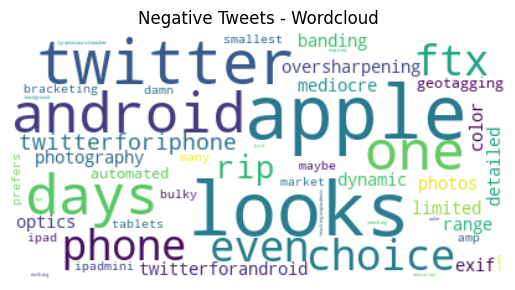

In [121]:
# Wordcloud with positive tweets
positive_tweets = Filteredtweets['TextClean'][Filteredtweets['Tweetsentiment'] == 'negative']
stop_words = ["iphone"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=60, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [122]:
OverallSentiment = Filteredtweets['Tweetsentiment'].mode()[0]

In [123]:
print('OverallSentiment: '+ OverallSentiment)

OverallSentiment: neutral


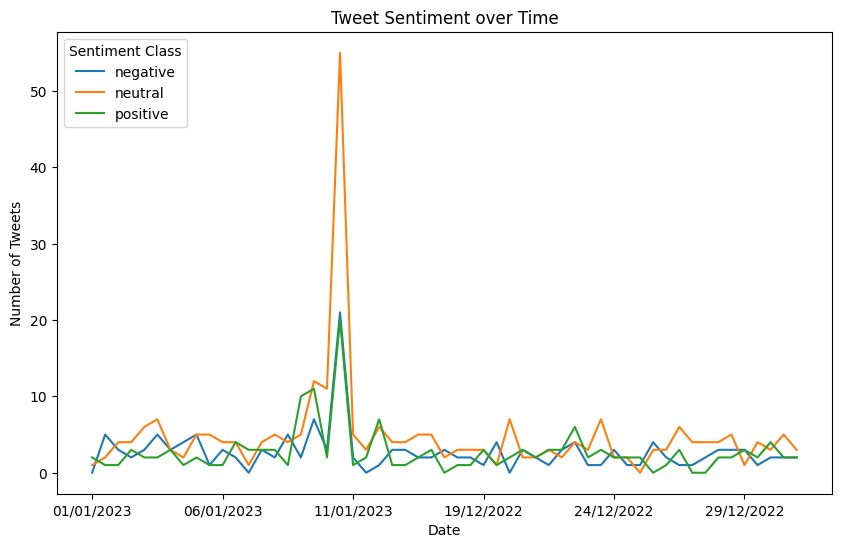

In [124]:
# Group the dataframe by date and sentiment class and count the number of tweets in each group
tweet_counts = Filteredtweets.groupby(['Datetime', 'Tweetsentiment']).size().unstack(fill_value=0)

# Plot the line graph
fig, ax = plt.subplots(figsize=(10, 6))
tweet_counts.plot(ax=ax)

# Add titles and labels
ax.set_title('Tweet Sentiment over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Tweets')
ax.legend(title='Sentiment Class', loc='upper left')
plot_Sentimentovertime = ax.get_figure()
# Show the plot
plt.show()


In [156]:
Filteredtweets2 = Filteredtweets.copy()

In [157]:
# convert the Datetime column to a pandas datetime object
Filteredtweets2['Datetime'] = pd.to_datetime(Filteredtweets2['Datetime'], dayfirst=True)

In [158]:
sentiment_coding = {'positive':1, 'negative':-1, 'neutral': 0} # Define a mapping of old values to new values
Filteredtweets2['Tweetsentiment'] = Filteredtweets2['Tweetsentiment'].replace(sentiment_coding)

In [159]:
Filteredtweets2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   index                     567 non-null    int64         
 1   Datetime                  567 non-null    datetime64[ns]
 2   Text                      567 non-null    object        
 3   Username                  513 non-null    object        
 4   Retweet                   567 non-null    int64         
 5   Views                     567 non-null    int64         
 6   Search Criteria           567 non-null    object        
 7   Sentiment                 567 non-null    object        
 8   TextClean                 567 non-null    object        
 9   Tweetsentiment            567 non-null    int64         
 10  TweetsentimentNoCleaning  567 non-null    object        
 11  CompareCnU                567 non-null    bool          
dtypes: bool(1), datetime64

In [160]:
Filteredtweets2.head(1)

,index,Datetime,Text,Username,Retweet,Views,Search Criteria,Sentiment,TextClean,Tweetsentiment,TweetsentimentNoCleaning,CompareCnU
0,5,2023-02-07,"? Tagged #Hashtag,#Ciberamenazas,#Ciberconsejos,#Ciberestafa,#Ciberseguridad,,#Cordoba, #Coronelrafemi,#Datos,#Delitostelematicos,,#Hackers,#Iphone,#Malware,#Marketing,#Movil,,#Password,#Phishing,#Rafaelfernandezmiquel,#Rafemi,#Rrss,#Troyano,#Viru,#Vishing,#Web,#Google",rafemi,0,27,Iphone,neutral,tagged hashtagciberamenazasciberconsejosciberestafaciberseguridadcordoba coronelrafemidatosdelitostelematicoshackersiphonemalwaremarketingmovilpasswordphishingrafaelfernandezmiquelrafemirrsstroyanoviruvishingwebgoogle,0,neutral,True


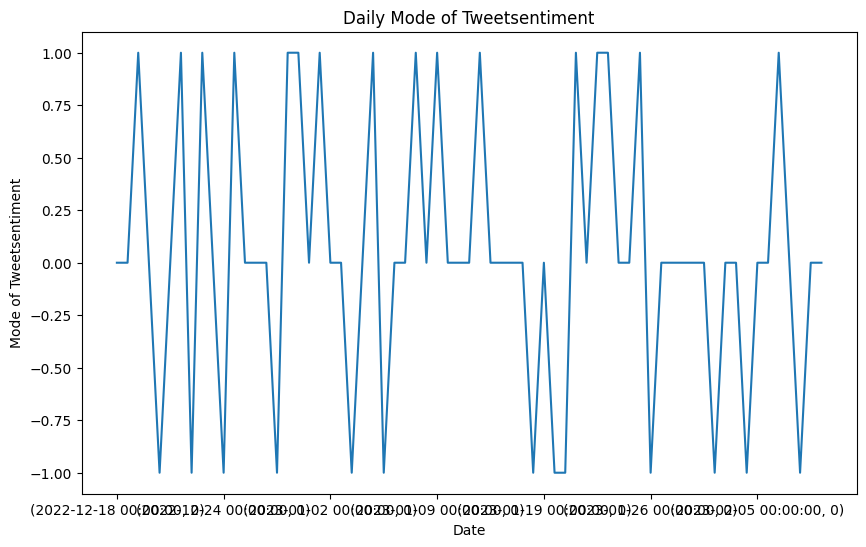

In [169]:
# convert the Datetime column to a pandas datetime object
Filteredtweets2['Datetime'] = pd.to_datetime(Filteredtweets2['Datetime'])

# group by day and compute the mode of the Tweetsentiment column
daily_mode = Filteredtweets2.groupby(pd.Grouper(key='Datetime', freq='D'))['Tweetsentiment'].apply(lambda x: x.mode())

# plot the daily mode of the Tweetsentiment column
fig, ax = plt.subplots(figsize=(10, 6))
daily_mode.plot(ax=ax, kind='line')
ax.set_xlabel('Date')
ax.set_ylabel('Mode of Tweetsentiment')
ax.set_title('Daily Mode of Tweetsentiment')
plt.show()

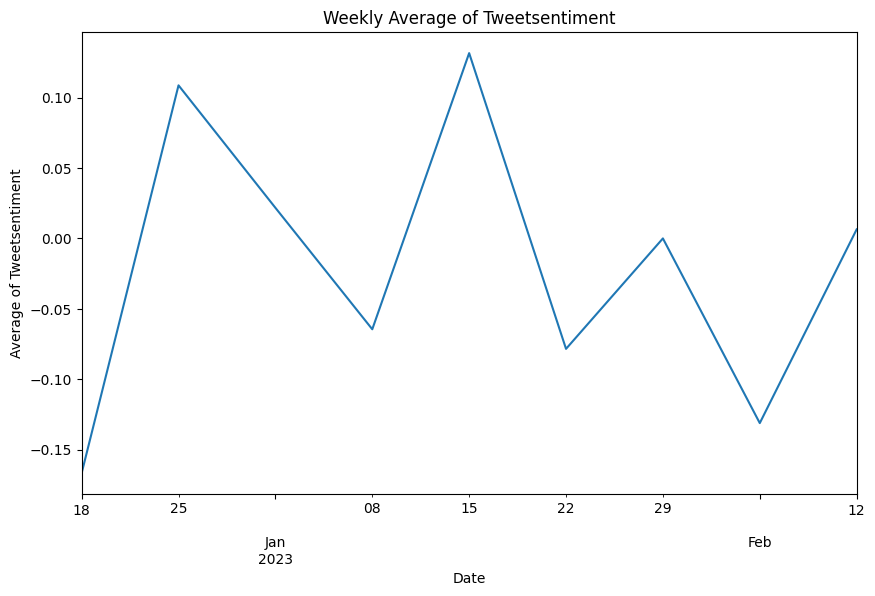

In [172]:
# convert the Datetime column to a pandas datetime object
Filteredtweets2['Datetime'] = pd.to_datetime(Filteredtweets2['Datetime'])

# group by week and compute the mode of the Tweetsentiment column
weekly_mode = Filteredtweets2.groupby(pd.Grouper(key='Datetime', freq='W'))['Tweetsentiment'].apply(lambda x: x.mean())

# plot the weekly mode of the Tweetsentiment column
fig, ax = plt.subplots(figsize=(10, 6))
weekly_mode.plot(ax=ax, kind='line')
ax.set_xlabel('Date')
ax.set_ylabel('Average of Tweetsentiment')
ax.set_title('Weekly Average of Tweetsentiment')
plt.show()


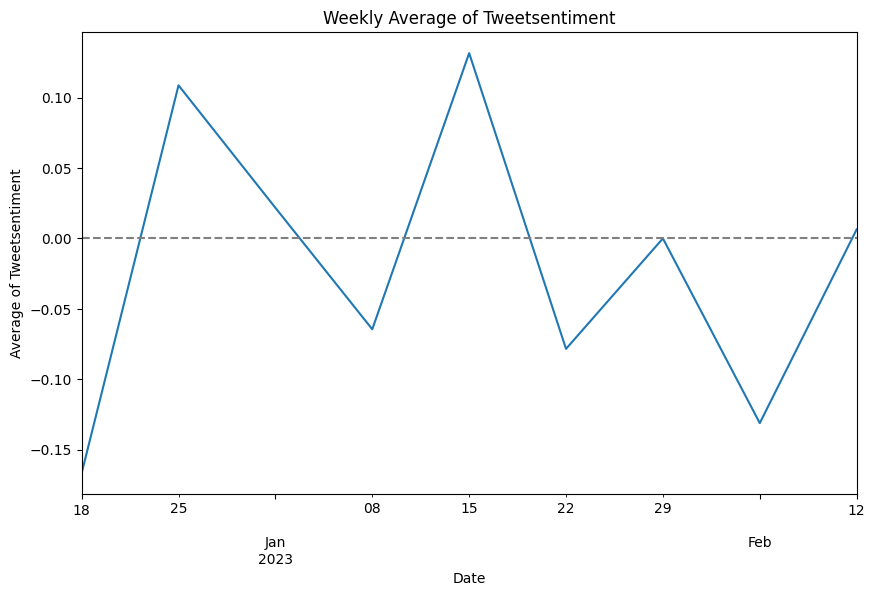

In [176]:
# convert the Datetime column to a pandas datetime object
Filteredtweets2['Datetime'] = pd.to_datetime(Filteredtweets2['Datetime'])

# group by week and compute the mode of the Tweetsentiment column
weekly_mode = Filteredtweets2.groupby(pd.Grouper(key='Datetime', freq='W'))['Tweetsentiment'].apply(lambda x: x.mean())

# plot the weekly mode of the Tweetsentiment column
fig, ax = plt.subplots(figsize=(10, 6))
weekly_mode.plot(ax=ax, kind='line')
ax.set_xlabel('Date')
ax.set_ylabel('Average of Tweetsentiment')
ax.set_title('Weekly Average of Tweetsentiment')
ax.axhline(y=0, color='gray', linestyle='--')
plot_WeeklyAverage = ax.get_figure()
plt.show()


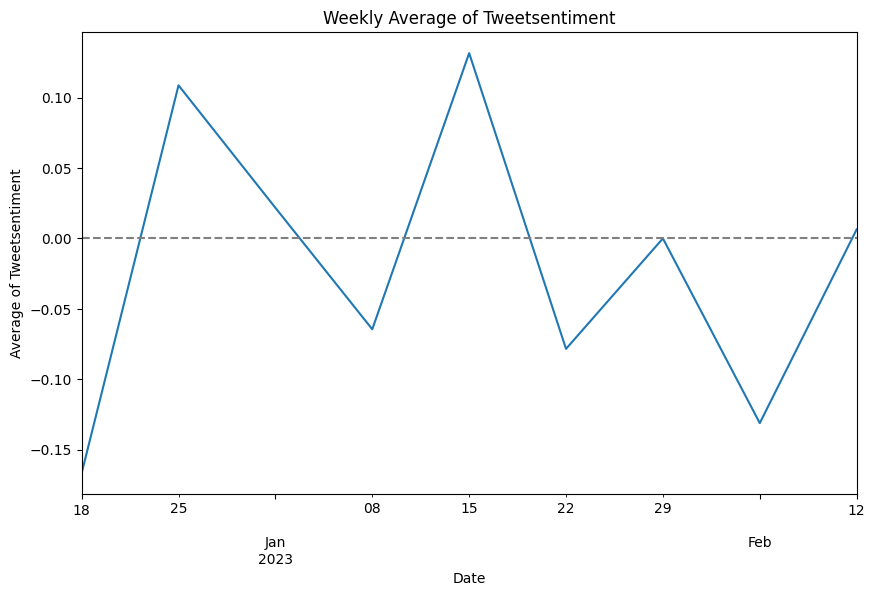

In [177]:
plot_WeeklyAverage

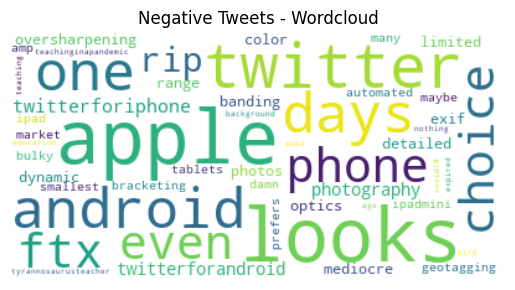

In [178]:
# Wordcloud with positive tweets
negative_tweets = Filteredtweets['TextClean'][Filteredtweets['Tweetsentiment'] == 'negative']
stop_words = ["iphone"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=60, max_words=50, background_color="white", stopwords=stop_words).generate(str(negative_tweets))

# Save the figure as a variable
fig = plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")

# Display the figure using plt.show()
plt.show()

In [193]:
topic = 'Iphone'

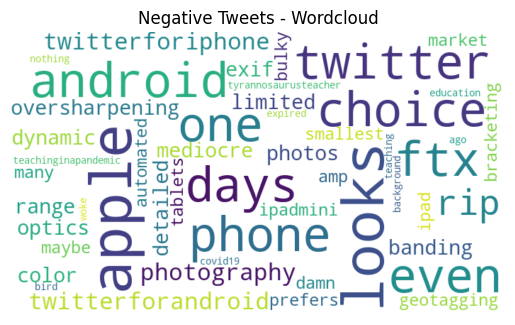

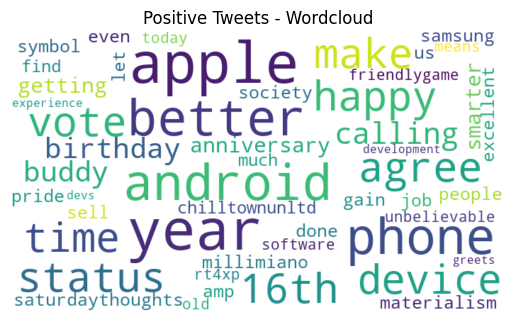

In [207]:
# Wordcloud with Negative tweets
NegativeWC = plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(WordCloud(width=700, height=400,max_font_size=80, max_words=50, background_color="white", stopwords=([topic.lower()] + list(STOPWORDS))).generate(str(Filteredtweets['TextClean'][Filteredtweets['Tweetsentiment'] == 'negative'])), interpolation="bilinear")
plt.axis("off")

# Display the figure using plt.show()
plt.show()
plt.close()

PositiveWC = plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(WordCloud(width=700, height=400,max_font_size=80, max_words=50, background_color="white", stopwords=([topic.lower()] + list(STOPWORDS))).generate(str(Filteredtweets['TextClean'][Filteredtweets['Tweetsentiment'] == 'positive'])), interpolation="bilinear")
plt.axis("off")

# Display the figure using plt.show()
plt.show()
plt.close()

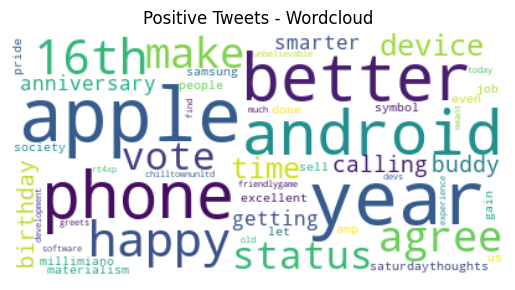

In [195]:
PositiveWC

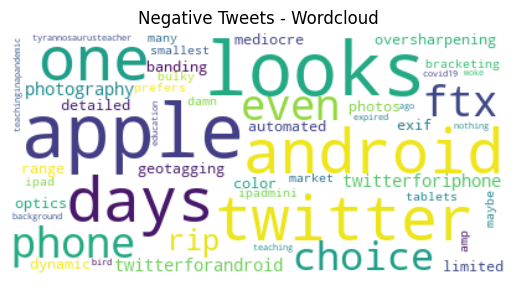

In [186]:
NegativeWC

In [ ]:
# Wordcloud with positive tweets
positive_tweets = Filteredtweets['TextClean'][Filteredtweets['Tweetsentiment'] == 'negative']
stop_words = ["iphone"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=60, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [208]:
NegativeWC.savefig('static/Nwordcloud.png')
PositiveWC.savefig('static/Pwordcloud.png')

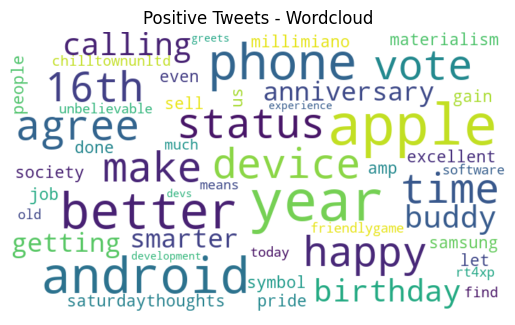

In [206]:
PositiveWC = plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(WordCloud(width=700, height=400,max_font_size=80, max_words=50, background_color="white", stopwords=([topic.lower()] + list(STOPWORDS))).generate(str(Filteredtweets['TextClean'][Filteredtweets['Tweetsentiment'] == 'positive'])), interpolation="bilinear")
plt.axis("off")

# Display the figure using plt.show()
plt.show()
plt.close()